#### 3. 내용 수집한 것을 CSV/EXCEL 파일로 저장하기  
① 리스트 형태의 데이터를 모은다.  

② DataFrame을 선언해 준다.
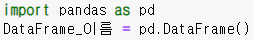

③ 리스트를 합해서 DataFrame을 만들어 준다.
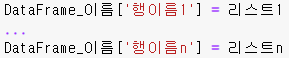

④ DataFrame을 CSV/EXCEL로(to) 내보낸다.
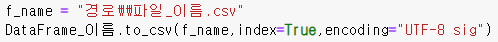
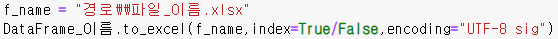
- True = Index가 자동으로 생성된다. (0부터 시작)
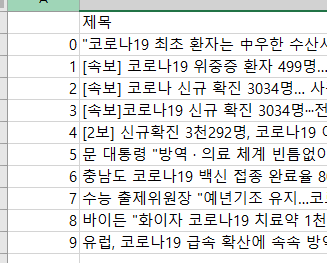
- False = Index가 생기지 않고 그대로 저장된다.
- Encoding: 'UTF-8 sig'에서 띄어쓰기 주의하기! UTF-8 sig는 더 다양한 기능이 있기에 기본으로 두고 사용하기

In [1]:
from selenium import webdriver
chrome_path = 'E:\\py_temp\\WebCrawling\\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
url = 'http://www.naver.com'
driver.get(url)
driver.maximize_window()
import time
time.sleep(3)
search_bar = driver.find_element_by_id("query")  
search_bar.click()
search_bar.send_keys("코로나")
search_bar.send_keys("\n")
news = driver.find_element_by_xpath("//*[@id='lnb']/div[1]/div/ul/li[2]/a")
news.click()

full_html = driver.page_source
from bs4 import BeautifulSoup
soup = BeautifulSoup(full_html,'html.parser')
content_list = soup.find('ul','list_news')
li_list = content_list.find_all('li','bx')
title = []
# 제목
for i in li_list:
    try:
        title.append(i.find('a','news_tit').get_text().strip())
    except:
        continue

contents = []
# 본문내용
for i in li_list:
    try:
        contents.append(i.find('a','api_txt_lines dsc_txt_wrap').get_text().strip())
    except:
        continue

company = []
# 언론사
for i in li_list:
    try:
        company.append(i.find('a','info press').get_text().strip())
    except:
        continue

time = []
# 개시시간
for i in li_list:
    try:
        time.append(i.find('span','info').get_text().strip())
    except:
        continue

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12036/935812904.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12036/935812904.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_bar = driver.find_element_by_id("query")
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12036/935812904.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  news = driver.find_element_by_xpath("//*[@id='lnb']/div[1]/div/ul/li[2]/a")


제목 = ['"코로나19 최초 환자는 中우한 수산시장 노점상"', '[속보] 코로나19 위중증 환자 499명… 어제 신규 확진 3034명', '[속보] 코로나 신규 확진 3034명… 사흘 연속 3000명대', '[속보]코로나19 신규 확진 3034명···전날 하루 28명 사망', '[2보] 신규확진 3천292명, 코로나19 이후 역대 최다…위중증 506명', '문 대통령 "방역 · 의료 체계 빈틈없이 가동…코로나 안정에 총력"', '충남도 코로나19 백신 접종 완료율 80% 돌파', '수능 출제위원장 "예년기조 유지…코로나 학력격차 특이점 없어"(종합)', '바이든 "화이자 코로나19 치료약 1천만명분 무료 제공"', '유럽, 코로나19 급속 확산에 속속 방역조치 강화']

본문내용 = ['코로나19 최초 환자는 중국 우한의 화난수산물도매시장에서 일하던 한 노점상이라는 분석 결과가... 시장이 코로나19의 발원지임을 시사한 조사입니다. 월스트리트저널과 뉴욕타임스에 따르면 미국 애리조나대...', '사진=뉴스1 코로나19 위중증 환자 499명…어제 신규확진 3034명', '코로나19 국내 확진자 수가 전날 대비 3034명 늘었다. 하루 신규 확진자 수가 사흘 연속 3000명대를 기록하고 있는 것이다. 질병관리청 중앙방역대책본부는 19일 0시 기준 국내 코로나19 누적 확진자 수는 총...', '중앙방역대책본부는 19일 0시 기준 코로나19 신규 확진자가 3034명이라고 밝혔다. 이날 국내 발생... 코로나19로 인한 사망자는 28명 늘어 누적 3215명(치명률 0.79%)이다. 입원 중인 위중증 환자는 499명으로...', '이틀 연속 3천명대 확진자 나와…사망자 29명, 누적 3천187명 서울 1천423명·경기 965명·인천 195명 등 수도권만 2천583명 신종 코로나바이러스 감염증(코로나19) 신규 확진자가 18일 이틀 연속 3천명을 넘으면서...', '문재인 대통령은 단계적 일상회복이 시작되면서 코로나 확진자가 다시 늘고 있는 것과 관련해 "외국의... 

In [6]:
# 5. 내용 수집한 것을 CSV 파일로 저장한다.

# ① 리스트 형태의 데이터를 모은다.

# ② DataFrame을 선언해 준다.
import pandas as pd # Pandas 불러오기
df_news = pd.DataFrame()

# ③ 리스트를 합해서 DataFrame을 만들어 준다.
df_news['제목'] = title
df_news['내용'] = contents
df_news['언론사'] = company
df_news['개시시간'] = time

# ④ DataFrame을 CSV로(to) 내보낸다.
f_name = "E:\\py_temp\\WebCrawling\\df_news.csv" # 경로 설정
df_news.to_csv(f_name,index=True,encoding="UTF-8 sig")

In [12]:
# 5. 내용 수집한 것을 EXCEL 파일로 저장한다.

# ① 리스트 형태의 데이터를 모은다.

# ② DataFrame을 선언해 준다.
import pandas as pd # Pandas 불러오기
df_news = pd.DataFrame()

# ③ 리스트를 합해서 DataFrame을 만들어 준다.
df_news['제목'] = title
df_news['내용'] = contents
df_news['언론사'] = company
df_news['개시시간'] = time

# ④ DataFrame을 EXCEL로(to) 내보낸다.
f_name = "E:\\py_temp\\WebCrawling\\df_news.xlsx" # 경로 설정
df_news.to_excel(f_name,index=True,encoding="UTF-8 sig")

#### 4. 사용자에게서 검색 건수를 입력 받기  
① 사용자에게서 검색 건수 입력을 받는다. (반드시 입력 받은 검색 건수는 int를 이용하여 정수로 만들어 줘야 함)


② 해당 페이지에 총 검색 건수로 나눈 후, 반올림한다.
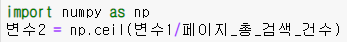

③ for loop을 이용하여 click() 및 정보를 수집한다.  
예) 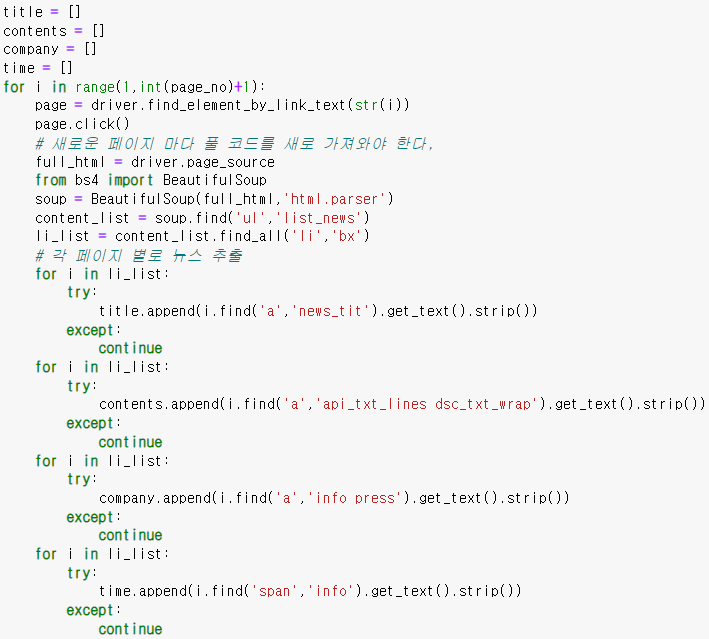
- 정보 수집 시, 새로운 페이지로 넘어갈 때 마다 코드를 새로/다시 입력해야 한다.

실습1) 사용자에게 검색 건수를 입력 받아 페이지를 넘기시오.
- 해당 검색 건수가 있는 페이지로 이동해야 한다.
- 페이지 당 n건의 검색 건수가 있으면 n으로 나누어준다.
- 검색 건수로 나누어 준 값은 해당 검색 건수가 있는 페이지인데, 페이지는 소숫점이 아니기 때문에 올림해 준다.

In [17]:
import numpy as np # ceil(반올림)를 사용하기 위해 선언
cnt = int(input("검색 건수를 입력하세요: ")) # 사용자에게서 검색 건수 받기
page_no = np.ceil(cnt/10) # 페이지 당 10건의 뉴스가 있기에 나누기 # 소숫점이 있으면 안돼기 때문에 반올림하기
print("열람할 수 있는 페이지 수는: ", page_no)

from selenium import webdriver
chrome_path = 'E:\\py_temp\\WebCrawling\\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
url = 'http://www.naver.com'
driver.get(url)
driver.maximize_window()
import time
time.sleep(3)
search_bar = driver.find_element_by_id("query")  
search_bar.click()
search_bar.send_keys("코로나")
search_bar.send_keys("\n")
news = driver.find_element_by_xpath("//*[@id='lnb']/div[1]/div/ul/li[2]/a")
news.click()

for i in range(1,int(page_no)+1): # page_no를 정수로 표현해야 하기 때문에 int 씌우기
    page = driver.find_element_by_link_text(str(i))
    page.click()
    time.sleep(1)

검색 건수를 입력하세요: 13
열람할 수 있는 페이지 수는:  2.0


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12036/754359876.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12036/754359876.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_bar = driver.find_element_by_id("query")
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12036/754359876.py:18: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  news = driver.find_element_by_xpath("//*[@id='lnb']/div[1]/div/ul/li[2]/a")
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12036/754359876.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  page = driver.find_element_by_link_text(str(i))


실습2) 사용자에게서 검색 건수를 입력 받아 해당 검색 건수가 있는 페이지 수의 모든 뉴스 요약 정리하기

In [2]:
import numpy as np
cnt = int(input("검색 건수를 입력하세요: "))
page_no = np.ceil(cnt/10)
print("열람할 수 있는 페이지 수는: ", page_no)

from selenium import webdriver
chrome_path = 'E:\\py_temp\\WebCrawling\\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
url = 'http://www.naver.com'
driver.get(url)
driver.maximize_window()
import time
time.sleep(3)
search_bar = driver.find_element_by_id("query")  
search_bar.click()
search_bar.send_keys("코로나")
search_bar.send_keys("\n")
news = driver.find_element_by_xpath("//*[@id='lnb']/div[1]/div/ul/li[2]/a")
news.click()

title = []
contents = []
company = []
time = []
for i in range(1,int(page_no)+1):
    page = driver.find_element_by_link_text(str(i))
    page.click()
    # 새로운 페이지 마다 풀 코드를 새로 가져와야 한다,
    full_html = driver.page_source
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(full_html,'html.parser')
    content_list = soup.find('ul','list_news')
    li_list = content_list.find_all('li','bx')
    # 각 페이지 별로 뉴스 추출
    for i in li_list:
        try:
            title.append(i.find('a','news_tit').get_text().strip())
        except:
            continue
    for i in li_list:
        try:
            contents.append(i.find('a','api_txt_lines dsc_txt_wrap').get_text().strip())
        except:
            continue
    for i in li_list:
        try:
            company.append(i.find('a','info press').get_text().strip())
        except:
            continue
    for i in li_list:
        try:
            time.append(i.find('span','info').get_text().strip())
        except:
            continue

news=[title,contents,company,time]
            
for i in range(0,len(title)):
    print('\n')
    print("1. Title: ", news[0][i])
    print("2. Contents: ", news[1][i])
    print("3. PaperCompany: ", news[2][i])
    print("4. TimeLine: ", news[3][i])
    print('\n')
    print('-'*80)

검색 건수를 입력하세요: 13
열람할 수 있는 페이지 수는:  2.0


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_7192/202614688.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_7192/202614688.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_bar = driver.find_element_by_id("query")
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_7192/202614688.py:18: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  news = driver.find_element_by_xpath("//*[@id='lnb']/div[1]/div/ul/li[2]/a")
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_7192/202614688.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  page = driver.find_element_by_link_text(str(i))




1. Title:  "코로나19 최초 환자는 中우한 수산시장 노점상"
2. Contents:  코로나19 최초 환자는 중국 우한의 화난수산물도매시장에서 일하던 한 노점상이라는 분석 결과가... 시장이 코로나19의 발원지임을 시사한 조사입니다. 월스트리트저널과 뉴욕타임스에 따르면 미국 애리조나대...
3. PaperCompany:  MBC언론사 선정
4. TimeLine:  3시간 전


--------------------------------------------------------------------------------


1. Title:  대장동 수사팀 코로나 집단감염 전날 16명 단체회식 들통
2. Contents:  대장동 개발 의혹을 수사하는 서울중앙지검 전담수사팀이 코로나19 연쇄감염 직전 단체로 저녁 모임을 했던... 이날 저녁 모임을 갖고 난 다음 날 수사팀 내부에선 코로나19 확진자가 연이어 발생했다. 부장검사를 포함해...
3. PaperCompany:  파이낸셜뉴스언론사 선정
4. TimeLine:  2시간 전


--------------------------------------------------------------------------------


1. Title:  코로나19 신규확진 3034명…위중증 499명
2. Contents:  국내 코로나19 신규 확진자가 사흘 연속 3000명대 나왔다. 19일 0시 기준 신규 확진자는 3034명으로, 전날보다는 258명 줄었다. 하지만 지난 주 같은 요일인 12일보다 666명 늘어난 숫자다. 입원 중인 위중증 환자는...
3. PaperCompany:  TV조선언론사 선정
4. TimeLine:  1시간 전


--------------------------------------------------------------------------------


1. Title:  [2보] 신규확진 3천292명, 코로나19 이후 역대 최다…위중증 506명
2. Contents

In [4]:
# 사용자 함수를 만들어 각 페이지 별 검색 건수를 긁어 올 수 있도록 지정하기
def news_summary():
    # 새로운 페이지 마다 풀 코드를 새로 가져와야 한다,
    full_html = driver.page_source
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(full_html,'html.parser')
    content_list = soup.find('ul','list_news')
    li_list = content_list.find_all('li','bx')
    # 각 페이지 별로 뉴스 추출
    for i in li_list:
        try:
            title.append(i.find('a','news_tit').get_text().strip())
        except:
            continue
    for i in li_list:
        try:
            contents.append(i.find('a','api_txt_lines dsc_txt_wrap').get_text().strip())
        except:
            continue
    for i in li_list:
        try:
            company.append(i.find('a','info press').get_text().strip())
        except:
            continue
    for i in li_list:
        try:
            time.append(i.find('span','info').get_text().strip())
        except:
            continue

# 페이지를 넘기는 for loop
for i in range(1,int(page_no)+1):
    page = driver.find_element_by_link_text(str(i))
    page.click()
    news_summary()

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_7192/511179098.py:32: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  page = driver.find_element_by_link_text(str(i))


실습3) 위 내용을 '대한민국 구석구석' 사이트에서 행하자.

In [5]:
import numpy as np
cnt = int(input("검색 건수를 입력하세요: "))
page_no = np.ceil(cnt/10)
print("열람할 수 있는 페이지 수는: ", page_no)

from selenium import webdriver
chrome_path = 'E:\\py_temp\\WebCrawling\\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
url = 'https://korean.visitkorea.or.kr/'
driver.get(url)
driver.maximize_window()
import time
time.sleep(3)
search_bar = driver.find_element_by_id("inp_search")  
search_bar.click()
search_bar.send_keys("부산")
search_bar.send_keys("\n")

title = []
location = []
keyword = []
for i in range(1,int(page_no)+1):
    page = driver.find_element_by_link_text(str(i))
    page.click()
    full_html = driver.page_source
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(full_html,'html.parser')
    content_list = soup.find('div','box_leftType1')
    li_list = content_list.find_all('div','area_txt')
    for i in li_list:
        try:
            title.append(i.find('div','tit').get_text().strip())
        except:
            continue
    for i in li_list:
        try:
            location.append(i.find('div','service').get_text().strip())
        except:
            continue
    for i in li_list:
        try:
            keyword.append(i.find('p','tag_type').get_text().strip())
        except:
            continue

travel = [title,location,keyword]
            
for i in range(0,len(title)):
    print('\n')
    print("1. Title: ", travel[0][i])
    print("2. Location: ", travel[1][i])
    print("3. Keywords: ", travel[2][i])
    print('\n')
    print('-'*80)

검색 건수를 입력하세요: 15
열람할 수 있는 페이지 수는:  2.0


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_2416/1210912485.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_2416/1210912485.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_bar = driver.find_element_by_id("inp_search")
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_2416/1210912485.py:23: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  page = driver.find_element_by_xpath("//*[@id='%s']" %i)




1. Title:  부산의 자연생태 체험 코스
2. Location:  부산
3. Keywords:  #군위장곡자연휴양림#아미산전망대#부산암남공원#영도등대#국립해양박물관#바다풍경#박물관#힐링#자연좋은곳#데이트코스#연인과함께#여름여행#경상권#당일코스#1박2일#2박3일#추천코스


--------------------------------------------------------------------------------


1. Title:  영화보다 더 영화 같은 여행, 부산
2. Location:  부산 남구
3. Keywords:  #이기대도시자연공원#오륙도스카이워크#부산영화의전당#신세계센텀시티#복합문화공간#스카이워크#영화촬영지#바다풍경#데이트코스#연인과함께#친구와함께#도심여행#핫플레이스#당일코스#1박2일#2박3일#추천코스


--------------------------------------------------------------------------------


1. Title:  매력적인 공간으로의 여행! #부산
2. Location:  부산
3. Keywords:  #부산여행#부산가볼만한곳#겨울여행#부산차이나타운#차이나타운#망양로산복도로#초량이바구길#동백섬#호천마을#부평깡통야시장#깡통시장#로맨틱_무드_낭낭


--------------------------------------------------------------------------------


1. Title:  다시 만난 부산
2. Location:  부산
3. Keywords:  #부산여행#부산1박2일#아홉산숲#바다여행#카페여행#공공누리#뉴트로_감성여행


--------------------------------------------------------------------------------


1. Title:  붉게 물든 노을이 아름다운, 부산 일몰 명소
2. Location:  부산
3. Keywords:  #누리마루전망대#동백섬#장림포구#다대포#아미산전망대#

#### 5. 상세 페이지에 있는 내용(텍스트)을 화면에 출력한다.

실습) '대한민국 구석구석' 상세페이지의 제목, 본문내용, 수정일, 좋아요, 조회수를 가져오도록 코딩하시오.

In [2]:
from selenium import webdriver
chrome_path = 'E:\\py_temp\\WebCrawling\\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
url = 'https://korean.visitkorea.or.kr/'
driver.get(url)
driver.maximize_window()
import time
time.sleep(3)
search_bar = driver.find_element_by_id("inp_search")  
search_bar.click()
search_bar.send_keys("부산")
search_bar.send_keys("\n")
detail = driver.find_element_by_xpath("//*[@id='listBody']/ul/li[3]/div[2]/div[1]/a")
detail.click()

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_10644/1610776408.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_10644/1610776408.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_bar = driver.find_element_by_id("inp_search")
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_10644/1610776408.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  detail = driver.find_element_by_xpath("//*[@id='listBody']/ul/li[3]/div[2]/div[1]/a")


In [6]:
full_html = driver.page_source
from bs4 import BeautifulSoup
soup = BeautifulSoup(full_html,'html.parser')
content_list = soup.find('div',id = "contents")

print("제목: ",content_list.find('div','tit').get_text().strip())
print()
print("본문 내용: ",content_list.find('div','txt_p').get_text().strip())
print()
print(content_list.find('div','area_address').get_text().strip())
print()
print("좋아요: ",content_list.find('span',id="conLike").get_text().strip())
print()
print("조회수: ",content_list.find('span',id="conRead").get_text().strip())

제목:  자갈치시장

본문 내용:  바다 보러 많이 떠나는 부산 여행.여행 속에서 부산만의 또 다른 매력을 느낄 수 있는 공간이 어딜까 고민하다가 결국 사람들이 많이 가는 곳만 가지는 않으셨나요? 대한민국 구석구석이 부산의 역사까지 한 번에 챙길 수 있는 여행지를 소개합니다.

부산 수정일 : 2020.03.05

좋아요:  18

조회수:  7.5K


In [53]:
# Another Method
def single_page (no):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    head = soup.find('div', class_="tit_cont titleType1")
    body = soup.find('div', class_="box_txtPhoto")

    try:
        title = head.find('h2').text.strip()
    except:
        print("내용이 없습니다")
    else:
        region_date = head.find('div','area_address').find_all('span')
        region = region_date[0].text.strip()
        date = region_date[1].text.strip()
        likes = head.find('span',id="conLike").text.strip()
        views = head.find('span', id="conRead").text.strip()
        body = soup.find('div', class_="box_txtPhoto").text.strip()

        print("article no : ", no)
        print("제목 : ", title)
        print("지역 : ", region)
        print("날짜 : ", date)
        print("좋아요 : ", likes)
        print("조회수 : ", views)
        print("해쉬태그 : ", hashtag)
        print("본문 : ", body)
        print("=-"*60)

        title_li_idv.append(title)
        contents_li_idv.append(body)
        date_li_idv.append(date)
        likes_li_idv.append(likes)
        views_li_idv.append(views)
        #지역
        region_li_idv.append(region)
        #해쉬태그
        hashtag_li_idv.append(hashtag)
        
        no+=1

single_page(1)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_5192/3058448497.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_5192/3058448497.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_bar = driver.find_element_by_id("inp_search")


내용이 없습니다


** 수정일의 경우 '부산 | 수정일'의 span 하나로 묶여있다. (각각 class가 할당되지 않음)
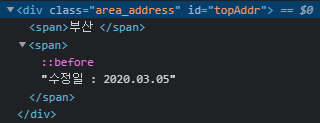
-> 따라서 이를 나누기 위해, 우선 find_all을 이용하여 모든 span을 가져온 다음 list와 같이 각각의 위치를 지정하여 추출한다.
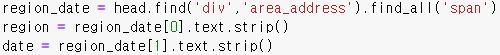

#### 6. 결과물 첫 페이지에 있는 본문들 차례대로 클릭해서 들어가기
- 뒤로가기: 
- 광고가 있을 수 있기 때문에, try_except를 이용해야 한다.

In [19]:
from selenium import webdriver
chrome_path = 'E:\\py_temp\\WebCrawling\\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
url = 'https://korean.visitkorea.or.kr/'
driver.get(url)
driver.maximize_window()
import time
time.sleep(3)
search_bar = driver.find_element_by_id("inp_search")  
search_bar.click()
search_bar.send_keys("부산")
search_bar.send_keys("\n")

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_10644/2876854210.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_10644/2876854210.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_bar = driver.find_element_by_id("inp_search")


In [22]:
# 첫페이지 본문들 차례대로 Click
for i in range(1,11):
    try:
        detail = driver.find_element_by_xpath("//*[@id='listBody']/ul/li[%s]/div[2]/div[1]/a" %i)
        detail.click()
        time.sleep(1)
        driver.back()
        time.sleep(1)
    except:
        pass

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_10644/471182046.py:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  detail = driver.find_element_by_xpath("//*[@id='listBody']/ul/li[%s]/div[2]/div[1]/a" %i)


In [ ]:
# Another Method
for title_no in range(1,12):
    time.sleep(1)
    try:
#     driver.find_element_by_xpath("""//*[@id="listBody"]/ul/li[%s]/div[2]/div[1]/a""" % title_no).click()
        driver.find_element_by_css_selector('#listBody > ul > li:nth-child(%s) > div.area_txt > div.tit > a' %title_no).click( )
        time.sleep(2)
        single_page(1)
        print("page : " , title_no)
    except:
        continue
    driver.back()